In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import bls

In [2]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('bls_cpi_data.csv')
cpi_data = pd.read_csv('bls_cpi_data.csv')
cpi_data.columns = 'Date','CPI'

In [3]:
cpi_data

,Date,CPI
0,2014-01,233.916
1,2014-02,234.781
2,2014-03,236.293
3,2014-04,237.072
4,2014-05,237.900
...,...,...
104,2022-09,296.808
105,2022-10,298.012
106,2022-11,297.711
107,2022-12,296.797


In [5]:
wages = bls.get_series('CIU2020000000000A')
# Wages and salaries for Private industry workers 
# in All industries and occupations, 12-month percent change 
wages.to_csv('bls_wages_data_csv')
df = pd.read_csv('bls_wages_data_csv')
df.columns = 'Date', 'Wages'
df.head()

No Data Available for Series CIU2020000000000A Year: 2023


,Date,Wages
0,2014Q1,1.7
1,2014Q2,1.9
2,2014Q3,2.3
3,2014Q4,2.2
4,2015Q1,2.8


In [4]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data['Date']

0      2014-01
1      2014-02
2       2014Q1
3      2014-04
4      2014-05
        ...   
104     2022Q3
105    2022-10
106    2022-11
107     2022Q4
108    2023-01
Name: Date, Length: 109, dtype: object

In [7]:
newcpi = cpi_data[(cpi_data.Date.str.contains("-") == False)]
newcpi.to_csv('cpi-clean.csv')

In [8]:
newcpi

,Date,CPI
2,2014Q1,236.293
5,2014Q2,238.343
8,2014Q3,238.031
11,2014Q4,234.812
14,2015Q1,236.119
17,2015Q2,238.638
20,2015Q3,237.945
23,2015Q4,236.525
26,2016Q1,238.132
29,2016Q2,241.018


In [10]:
newdf = df
newdf

,Date,Wages
0,2014Q1,1.7
1,2014Q2,1.9
2,2014Q3,2.3
3,2014Q4,2.2
4,2015Q1,2.8
5,2015Q2,2.2
6,2015Q3,2.1
7,2015Q4,2.1
8,2016Q1,2.0
9,2016Q2,2.6


In [12]:
newnum = 236.293
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return 
newwages = newdf.applymap(process_wages)

In [13]:
newwages

,Date,Wages
0,2014Q1,237.297245
1,2014Q2,238.424407
2,2014Q3,239.795348
3,2014Q4,241.114222
4,2015Q1,242.802021
5,2015Q2,244.137433
6,2015Q3,245.419154
7,2015Q4,246.707605
8,2016Q1,247.941143
9,2016Q2,249.552760


In [15]:
merged_data = pd.merge(newcpi, newwages, on='Date')

In [16]:
merged_data

,Date,CPI,Wages
0,2014Q1,236.293,237.297245
1,2014Q2,238.343,238.424407
2,2014Q3,238.031,239.795348
3,2014Q4,234.812,241.114222
4,2015Q1,236.119,242.802021
5,2015Q2,238.638,244.137433
6,2015Q3,237.945,245.419154
7,2015Q4,236.525,246.707605
8,2016Q1,238.132,247.941143
9,2016Q2,241.018,249.552760


Text(0.5, 0, 'Dates')

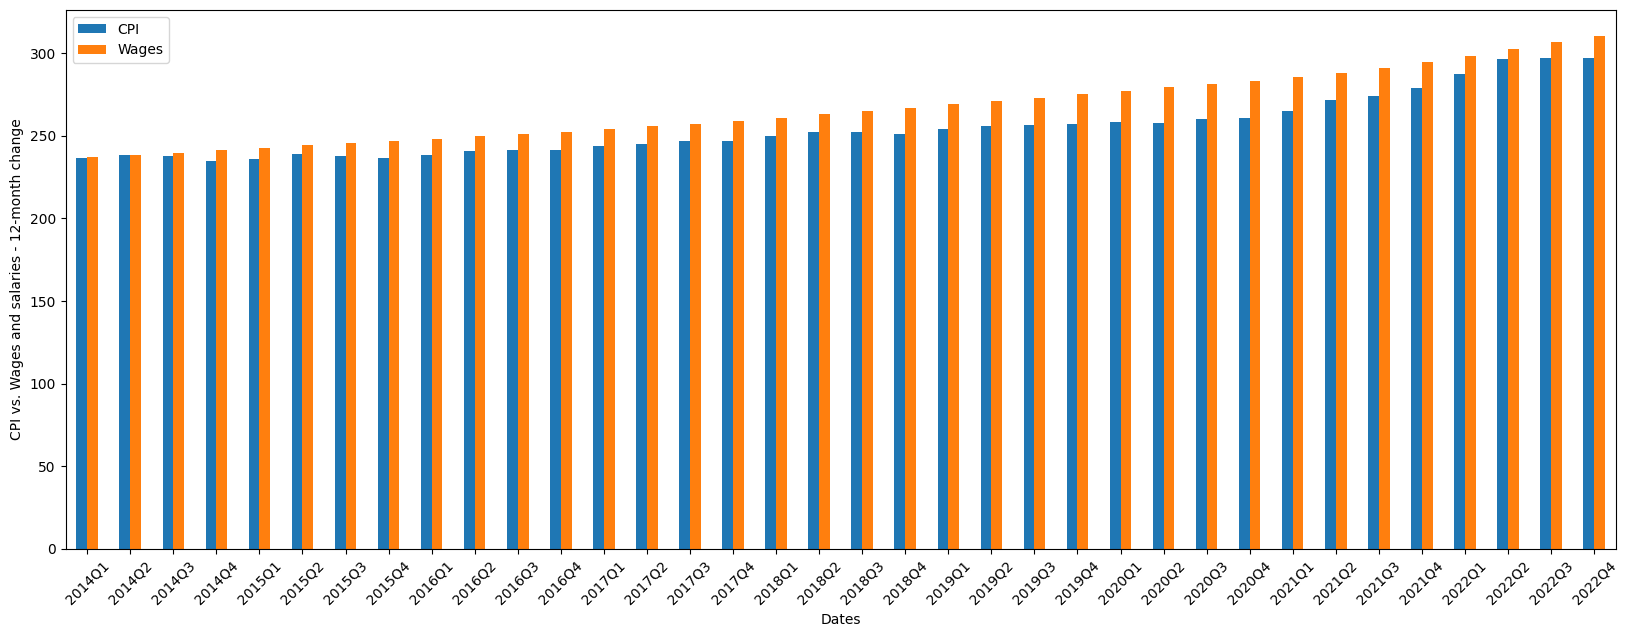

In [21]:
ax = merged_data.plot(kind='bar', figsize=(20,7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

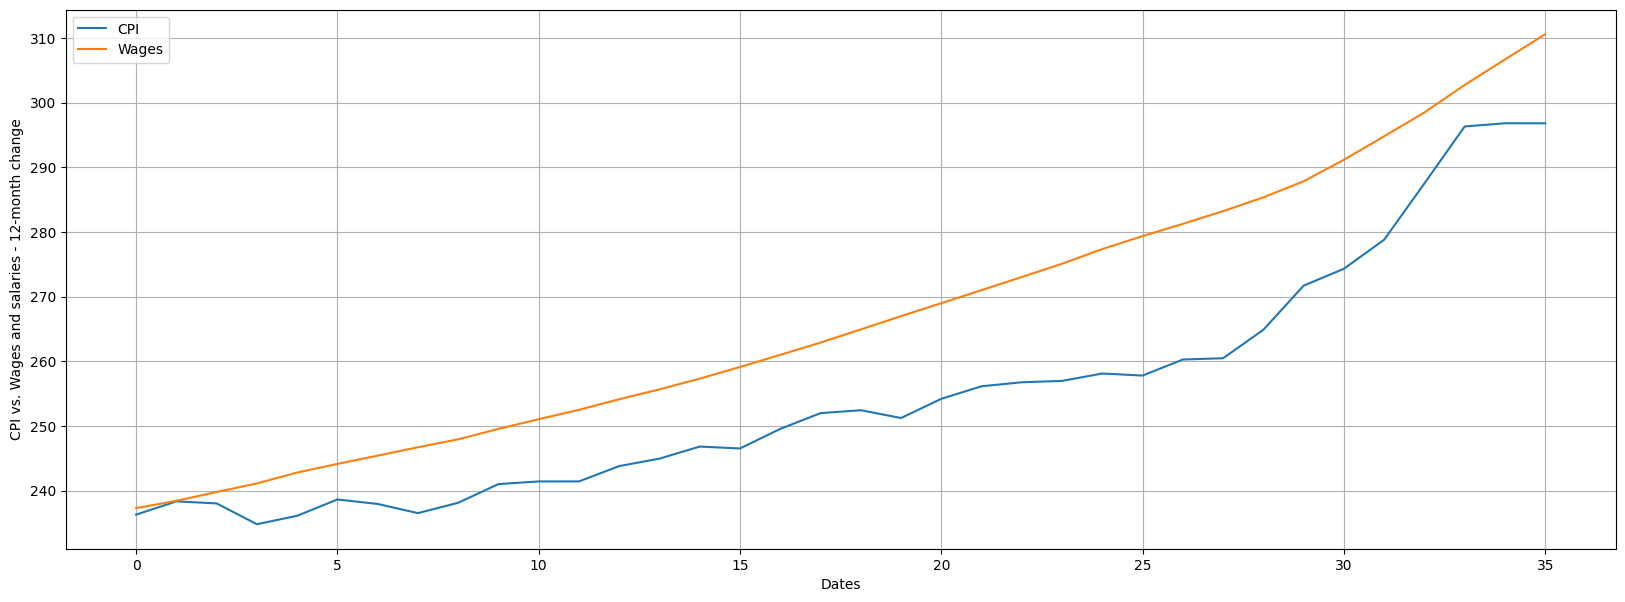

In [22]:
ax = merged_data.plot(kind='line', figsize=(20,7))
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()